In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
through = pd.read_csv('./result/throughput.csv', index_col=0)
output = pd.read_csv('./result/output.csv', index_col=0)

In [3]:
full = pd.concat([
    output,
    through
], axis=1)

full = full.rename(
    columns={
        'R01049': 'PRPP', 
        'R00268': 'amino_acid', 
        'R00351': 'Citric acid', 
        'R02740': 'Fructose 6-phosphate',
        'Lactate_output': 'Lactate',
        'Glucose_input': 'Glucose',
        'Biomass': 'Doubling Time'
    }
)

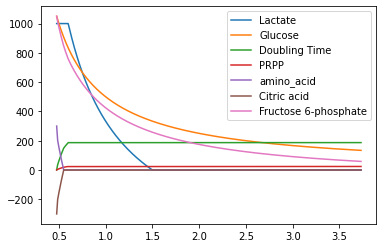

In [4]:
full.plot()

In [5]:
# full = full[(full.Lactate_output != 0) & (full.Glucose_input != 0) & (full.R00268 != 0) & (full.R00351 != 0)]

In [6]:
full.describe()

,Lactate,Glucose,Doubling Time,PRPP,amino_acid,Citric acid,Fructose 6-phosphate
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,509.398958,592.000000,168.916202,21.722455,19.605816,-19.605816,523.793499
std,399.010129,264.859397,41.656467,5.356980,54.986572,54.986572,276.031543
min,0.000000,134.000000,0.000000,0.000000,0.000000,-300.000000,58.479417
25%,59.237686,363.000000,187.029820,24.051848,0.000000,0.000000,287.479420
50%,517.237690,592.000000,187.029820,24.051848,0.000000,0.000000,516.479420
75%,975.237690,821.000000,187.029820,24.051848,0.000000,0.000000,745.479420
max,1000.000000,1050.000000,187.029820,24.051848,300.000000,0.000000,1050.000000


In [7]:
full = (full.T/np.array(full['Lactate'])).T.dropna()

 - PPRP (R01049)、 aKG (R00268)
 - Citrate (R00351), Succinate (R00405), F6P (R02740)

In [8]:
d = pd.read_csv('../result/slope.csv', index_col=0).T
v = pd.DataFrame(pd.read_excel('../result/lac.xlsx').mean()).T
v.columns = d.columns
slope = pd.concat([d, v])
slope = slope.rename(index={0:'Lactate'})
slope = pd.concat([slope, pd.DataFrame([21.78, 12.8, 16.84], columns=['Doubling Time'] , index=slope.columns).T])
s = slope.drop('Glutamate')

In [9]:
s.T

,Glucose,Lactate,Doubling Time
Control,0.082599,0.636289,21.78
Clone A,0.041715,3.734983,12.80
Clone B,0.013963,1.916520,16.84


In [10]:
f = pd.read_excel('../result/metabo_mean.xlsx', index_col=0).T

In [11]:
PRPP = f[['Cytosine', 'Uracil', 'Adenine', 'Guanine']]
PRPP_sum = []
for i in PRPP.index:
    PRPP_sum.append(sum(PRPP.T[i]))

PRPP_sum = pd.DataFrame(PRPP_sum, columns=['PRPP'], index=PRPP.index)

In [12]:
amino_acid = f[[
    'Ala', 'Arg', 'Asn', 'Asp', 'Gln', 'Glu', 'Gly', 'Ornithine', 'Pro', 'Ser'
]]

amino_acid_sum = []
for i in amino_acid.index:
    amino_acid_sum.append(sum(amino_acid.T[i]))
    
amino_acid_sum = pd.DataFrame(amino_acid_sum, columns=['amino_acid'], index=amino_acid.index)

In [13]:
metabo = pd.concat([
    f[['Fructose 6-phosphate', 'Citric acid']],
    amino_acid_sum,
    PRPP_sum
], axis=1).T

In [14]:
res = pd.concat([
    s, 
    metabo
])

In [15]:
res['Control']

Glucose                   0.082599
Lactate                   0.636289
Doubling Time            21.780000
Fructose 6-phosphate      0.144104
Citric acid               0.178913
amino_acid              145.107993
PRPP                      3.575803
Name: Control, dtype: float64

In [16]:
g = 60000
for i in full.index:
    mse = (
        (res['Control']['PRPP'] - full.T[i]['PRPP'])**2
    + (res['Control']['amino_acid'] - full.T[i]['amino_acid'])**2
    + (res['Control']['Citric acid'] - full.T[i]['Citric acid'])**2
    + (res['Control']['Lactate'] - full.T[i]['Lactate'])**2
    + (res['Control']['Glucose'] - full.T[i]['Glucose'])**2
    + (res['Control']['Doubling Time'] - full.T[i]['Doubling Time'])**2
    )
    if mse < g:
        g = mse
        l = i
        print(i)
        
Control = l

1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454


In [17]:
g = 67000
for i in full.index:
    mse = (
        (res['Clone A']['PRPP'] - full.T[i]['PRPP'])**2
    + (res['Clone A']['amino_acid'] - full.T[i]['amino_acid'])**2
    + (res['Clone A']['Citric acid'] - full.T[i]['Citric acid'])**2
    + (res['Clone A']['Lactate'] - full.T[i]['Lactate'])**2
    + (res['Clone A']['Glucose'] - full.T[i]['Glucose'])**2
    + (res['Clone A']['Doubling Time'] - full.T[i]['Doubling Time'])**2
    )
    if mse < g:
        g = mse
        l = i
        print(i)
        
CloneA = l

1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
0.5055611729019212
0.5050505050505051
0.5045408678102926
0.5040322580645161
0.5035246727089627
0.5030181086519114
0.5025125628140703
0.5020080321285141
0.5015045135406219
0.501002004008016
0.5005005005005005
0.5
0.4995004995004995
0.499001996007984
0.4985044865403789
0.4980079681274901
0.4975124378109453
0.4970178926441352
0.4965243296921549
0.4960317460317461
0.4955401387512389
0.4950495049504951
0.4945598417408506
0.4940711462450593
0.493583415597236
0.4930966469428008
0.4926108374384237
0.4921259842519685
0.4916420845624385
0.4911591355599214
0.4906771344455349
0.4901960784313725
0.4897159647404506
0.4892367906066536
0.4887585532746823
0.48828125
0.4878048780487805
0.4873294346978557
0.4868549172346641
0

In [18]:
g = 50000
for i in full.index:
    mse = (
        (res['Clone B']['PRPP'] - full.T[i]['PRPP'])**2
    + (res['Clone B']['amino_acid'] - full.T[i]['amino_acid'])**2
    + (res['Clone B']['Citric acid'] - full.T[i]['Citric acid'])**2
    + (res['Clone B']['Lactate'] - full.T[i]['Lactate'])**2
    + (res['Clone B']['Glucose'] - full.T[i]['Glucose'])**2
    + (res['Clone B']['Doubling Time'] - full.T[i]['Doubling Time'])**2
    )
    if mse < g:
        g = mse
        l = i
        print(i)
        
CloneB = l

1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
1.4005602240896358


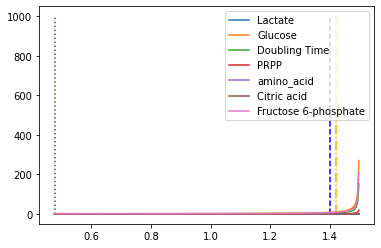

In [19]:
full.plot(logy=False)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([CloneA], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

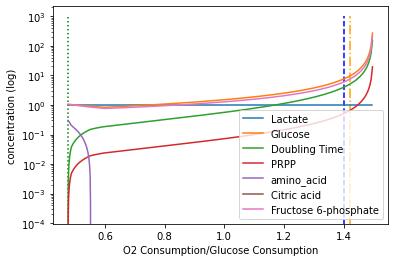

In [20]:
full.plot(logy=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

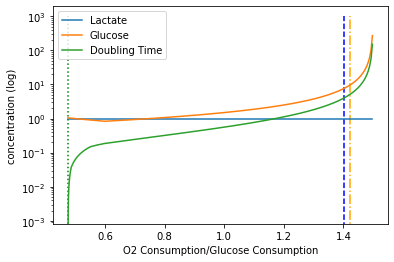

In [21]:
full[['Lactate', 'Glucose', 'Doubling Time']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

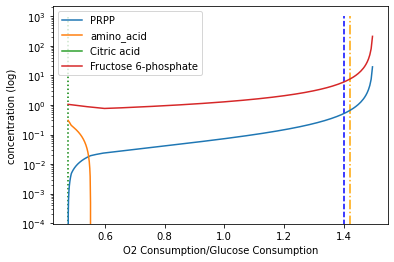

In [22]:
full[['PRPP', 'amino_acid', 'Citric acid', 'Fructose 6-phosphate']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

In [23]:
full = pd.concat([
    output,
    through
], axis=1)

full = full.rename(
    columns={
        'R01049': 'PRPP', 
        'R00268': 'amino_acid', 
        'R00351': 'Citric acid', 
        'R02740': 'Fructose 6-phosphate',
        'Lactate_output': 'Lactate',
        'Glucose_input': 'Glucose',
        'Biomass': 'Doubling Time'
    }
)

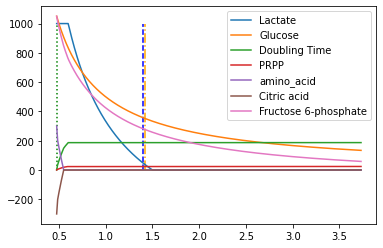

In [24]:
full.plot(logy=False)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([CloneA], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

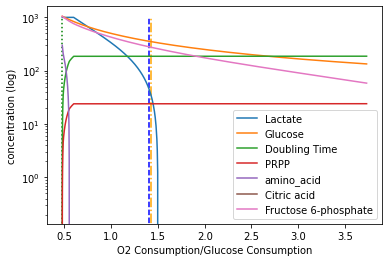

In [25]:
full.plot(logy=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

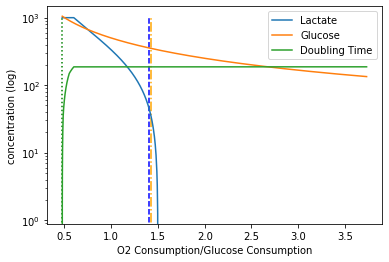

In [26]:
full[['Lactate', 'Glucose', 'Doubling Time']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

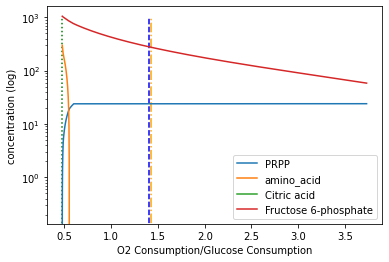

In [27]:
full[['PRPP', 'amino_acid', 'Citric acid', 'Fructose 6-phosphate']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')